In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
exp = [-12.64, -11.85, -4.68, -23.62, -25.47]
mm = [-17.02, -15.27, -9.55, -20.10, -20.72]
ml_mm_me = [-16.65, -15.73, -10.24, -28.87, -28.18]
ml_mm_ee = [-14.40, -13.42, -10.09, -27.02, -28.12]


In [3]:
data_dict = {
    'OpenFF/TIP3P': mm,
    'Exp.': exp,
    'Mechanical Embedding ML/MM': ml_mm_me,
    'Patched Model (This Work)': ml_mm_ee,
}

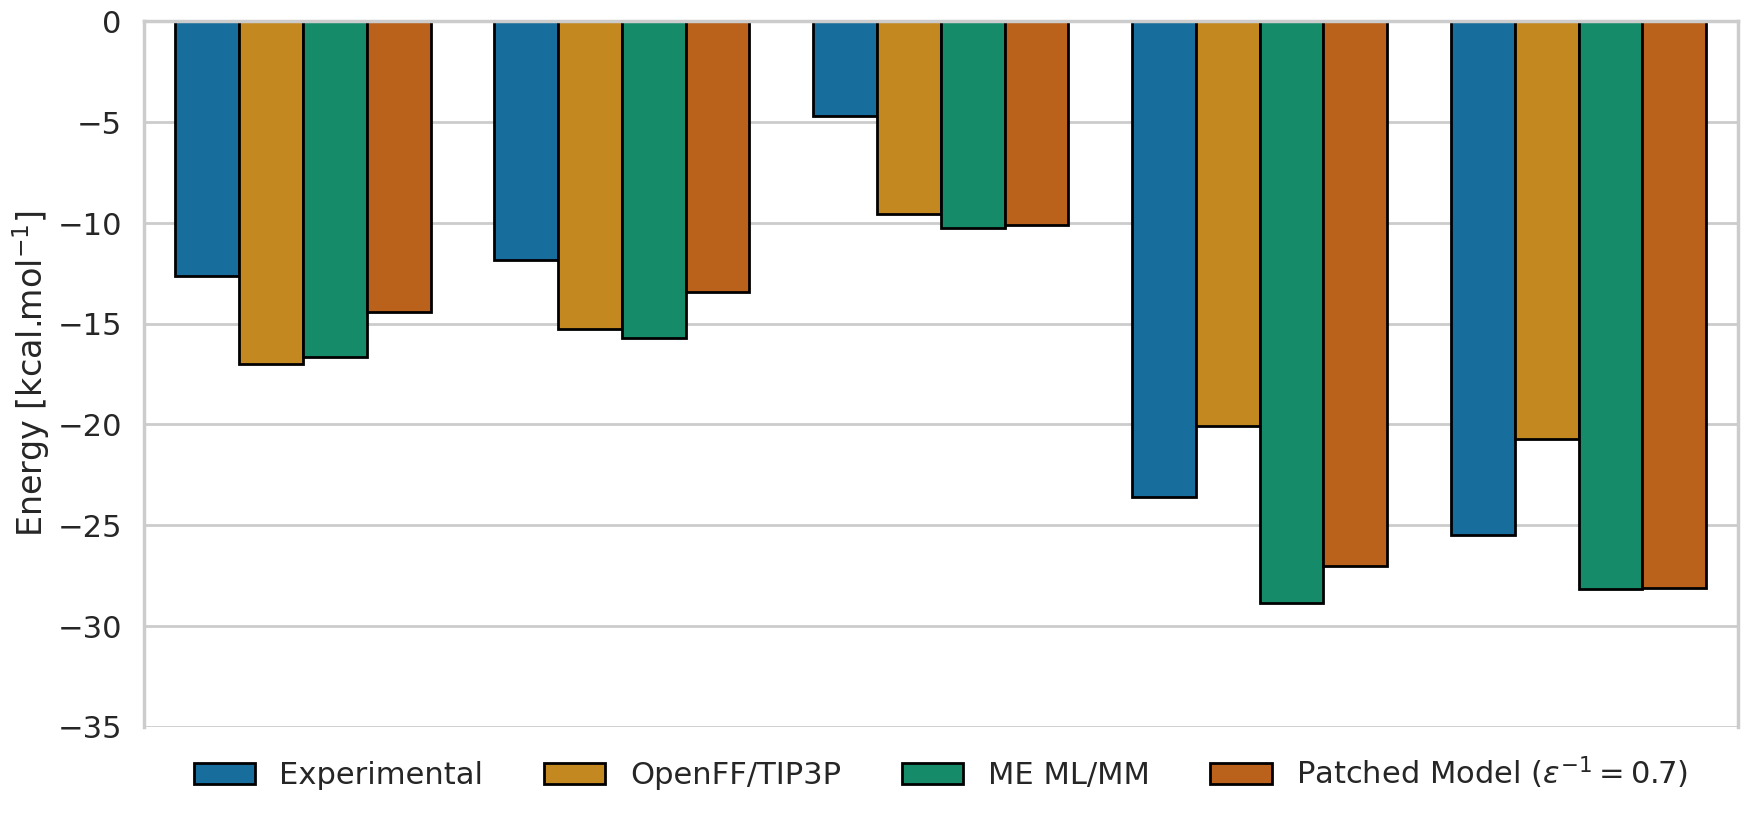

In [4]:
sns.set(style="whitegrid", palette="colorblind", context="poster")
plt.figure(figsize=(18, 8))

# Data
molecules = ["Mol1", "Mol2", "Mol3", "Mol4", "Mol5"]
data_dict = {
    "Model": [],
    "Molecule": [],
    "Energy": [],
}

# Convert dictionary to long format
for model, values in {
    'Experimental': exp,
    'OpenFF/TIP3P': mm,
    'ME ML/MM': ml_mm_me,
    r'Patched Model ($\epsilon^{-1}=0.7$)': ml_mm_ee,
}.items():
    for mol, energy in zip(molecules, values):
        data_dict["Model"].append(model)
        data_dict["Molecule"].append(mol)
        data_dict["Energy"].append(energy)

df = pd.DataFrame(data_dict)

# Plot
ax = sns.barplot(data=df, x="Molecule", y="Energy", hue="Model", edgecolor="black")

# Customize
ax.set_xticks([])
plt.ylabel(r"Energy [kcal.mol$^{-1}$]")
plt.xlabel("")
plt.tight_layout()
plt.legend(frameon=False, loc="upper center", bbox_to_anchor=(0.5, -0.00), ncol=4)
ax.spines["bottom"].set_visible(False)

ax.set_ylim(-35,0)

# Show
plt.savefig("hfe_transferable.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()


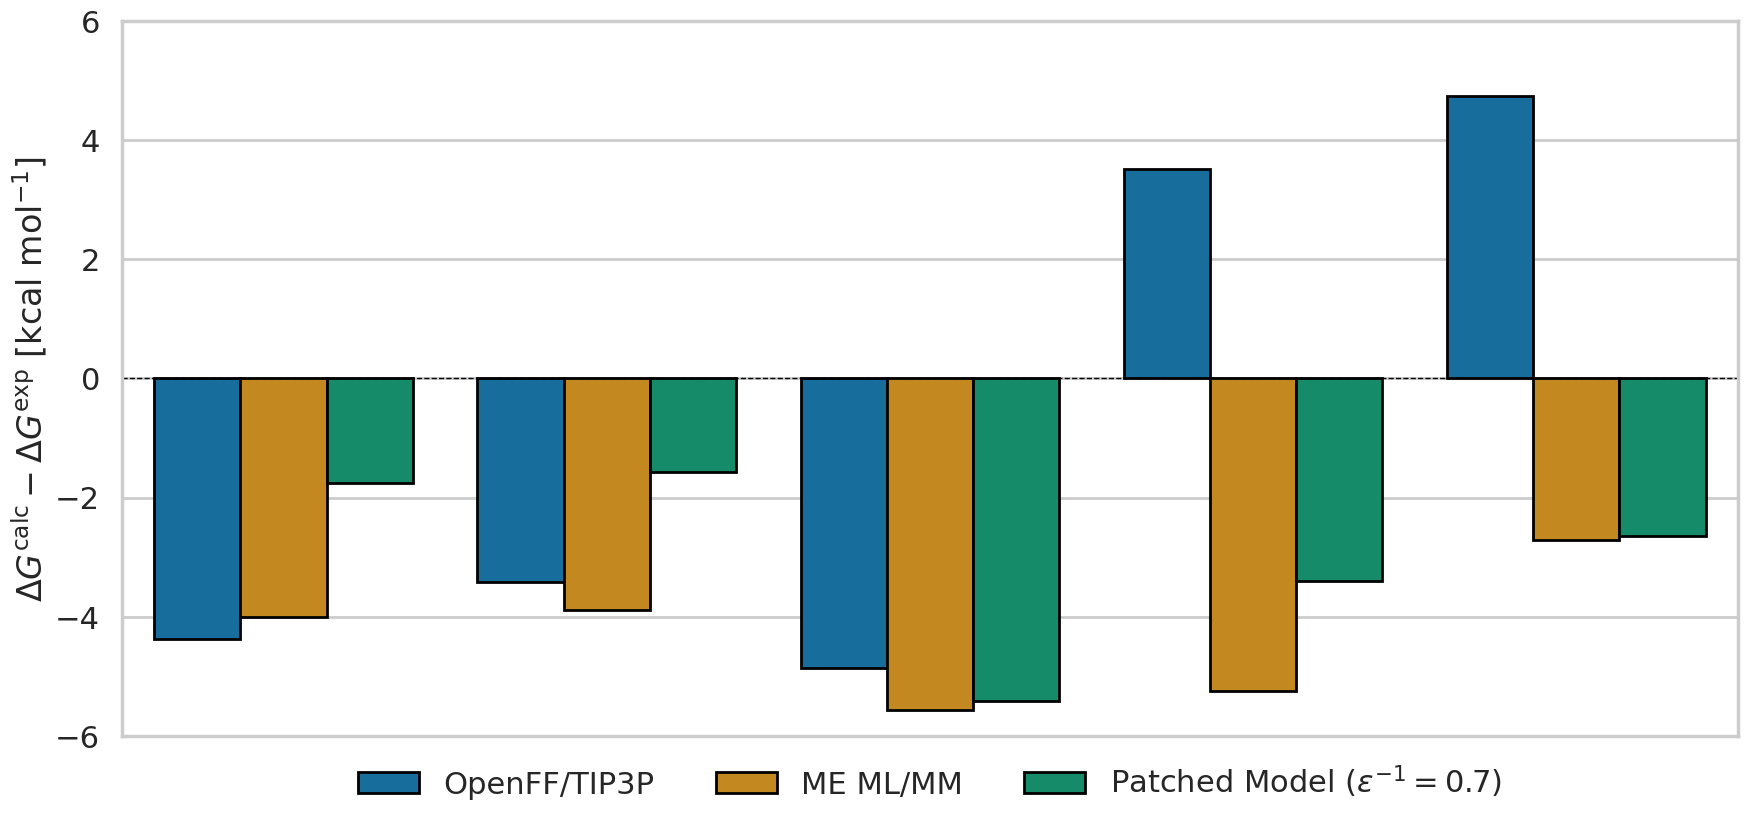

In [ ]:
sns.set(style="whitegrid", palette="colorblind", context="poster")
plt.figure(figsize=(18, 8))

# Data
molecules = ["Mol1", "Mol2", "Mol3", "Mol4", "Mol5"]
models = {
    'Experimental': exp,
    'OpenFF/TIP3P': mm,
    'ME ML/MM': ml_mm_me,
    r'Patched Model ($\epsilon^{-1}=0.7$)': ml_mm_ee,
}

# Compute errors w.r.t. experimental data
data_dict = {"Model": [], "Molecule": [], "Error": []}
exp_values = np.array(models["Experimental"])  # Convert experimental values to NumPy array

for model, values in models.items():
    if model == "Experimental":  # Skip experimental itself
        continue
    errors = np.array(values) - exp_values  # Compute error
    for mol, error in zip(molecules, errors):
        data_dict["Model"].append(model)
        data_dict["Molecule"].append(mol)
        data_dict["Error"].append(error)

df = pd.DataFrame(data_dict)

# Plot error bars
ax = sns.barplot(data=df, x="Molecule", y="Error", hue="Model", edgecolor="black")

# Customize
ax.set_xticks([])
plt.ylabel(r"$\Delta G^{\mathrm{calc}} - \Delta G^{\mathrm{exp}}$ [kcal mol$^{-1}$]")
plt.xlabel("")
plt.axhline(0, color="black", linewidth=1, linestyle="--")  # Add reference line at zero
plt.tight_layout()
plt.legend(frameon=False, loc="upper center", bbox_to_anchor=(0.5, 0), ncol=3)
# ax.spines["bottom"].set_visible(False)

# Adjust y-limits based on the errors range
ax.set_ylim(-6, 6)

# Show
plt.savefig("hfe_errors.pdf", dpi=300, bbox_inches="tight", transparent=True)
plt.show()


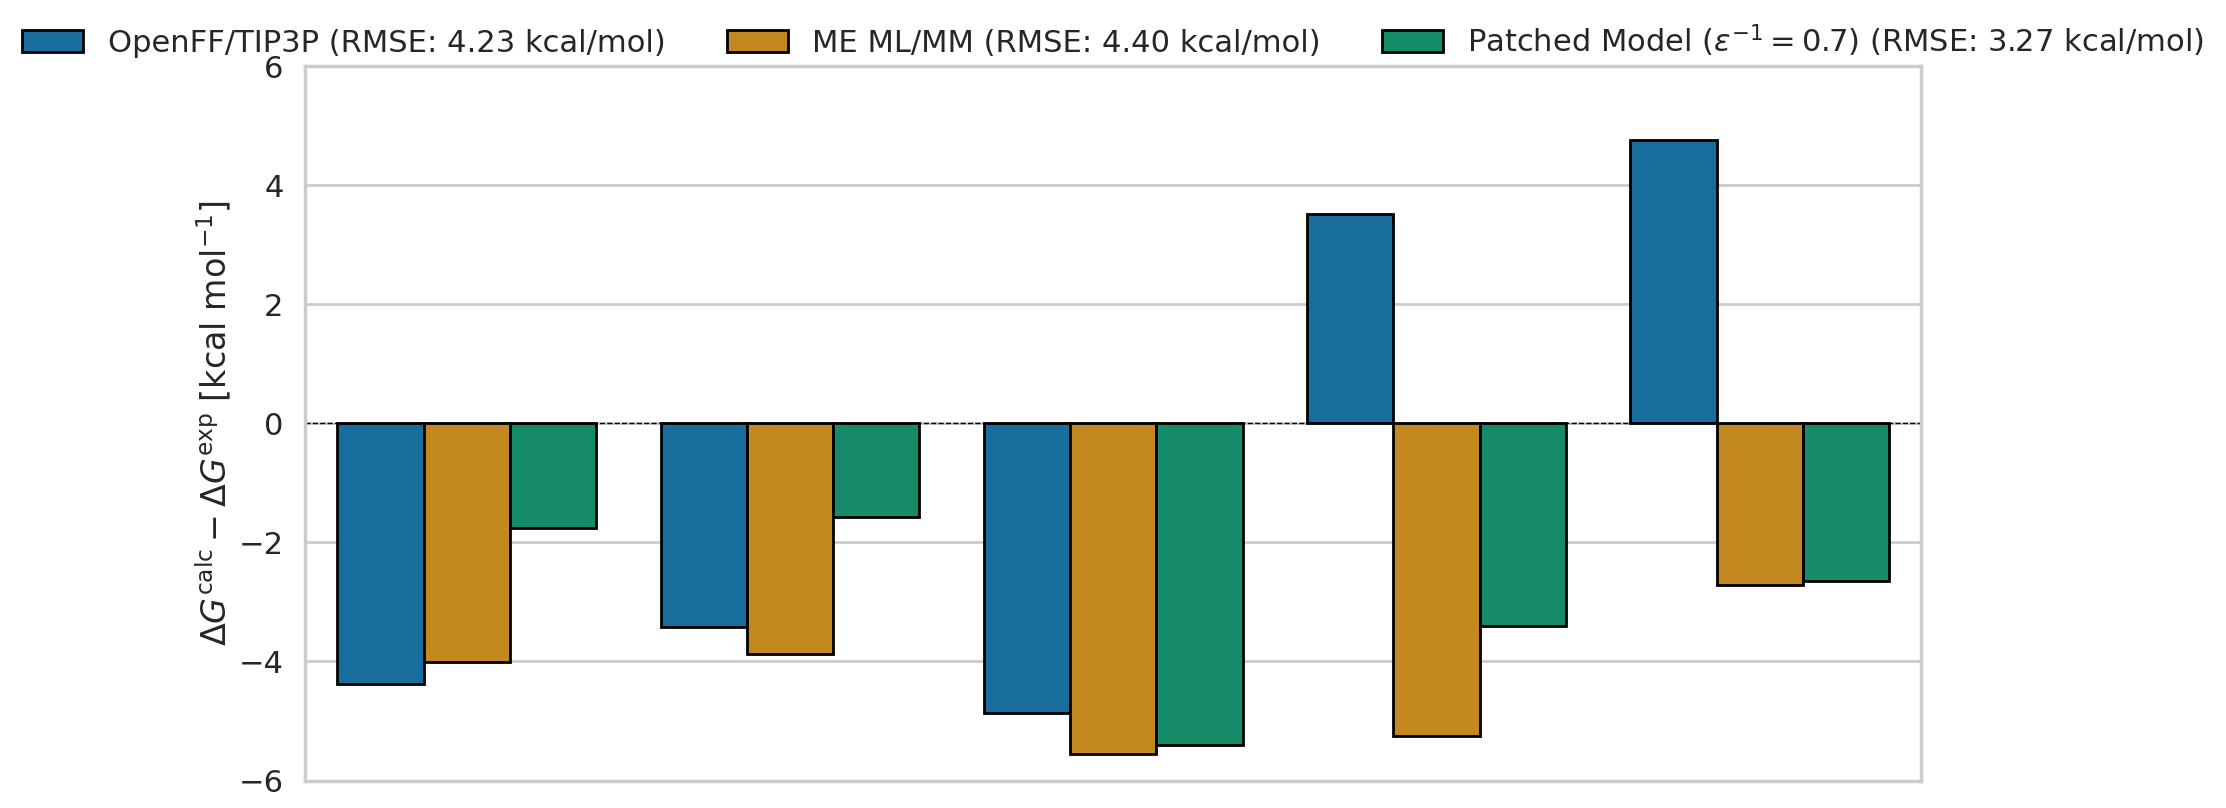

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="colorblind", context="poster")
plt.figure(figsize=(18, 8))

# Data
molecules = ["Mol1", "Mol2", "Mol3", "Mol4", "Mol5"]
models = {
    'Experimental': exp,
    'OpenFF/TIP3P': mm,
    'ME ML/MM': ml_mm_me,
    r'Patched Model ($\epsilon^{-1}=0.7$)': ml_mm_ee,
}

# Compute errors w.r.t. experimental data
data_dict = {"Model": [], "Molecule": [], "Error": []}
exp_values = np.array(models["Experimental"])  # Convert experimental values to NumPy array

rmse_dict = {}  # Dictionary to store RMSE values

for model, values in models.items():
    if model == "Experimental":  # Skip experimental itself
        continue
    errors = np.array(values) - exp_values  # Compute error
    rmse = np.sqrt(np.mean(errors ** 2))  # Compute RMSE
    rmse_dict[model] = rmse  # Store RMSE for the legend
    for mol, error in zip(molecules, errors):
        data_dict["Model"].append(model)
        data_dict["Molecule"].append(mol)
        data_dict["Error"].append(error)

df = pd.DataFrame(data_dict)

# Modify legend labels to include RMSE
legend_labels = {model: f"{model} (RMSE: {rmse:.2f} kcal/mol)" for model, rmse in rmse_dict.items()}

# Plot error bars
ax = sns.barplot(data=df, x="Molecule", y="Error", hue="Model", edgecolor="black")

# Customize
ax.set_xticks([])
plt.ylabel(r"$\Delta G^{\mathrm{calc}} - \Delta G^{\mathrm{exp}}$ [kcal mol$^{-1}$]")
plt.xlabel("")
plt.axhline(0, color="black", linewidth=1, linestyle="--")  # Reference line at zero
plt.tight_layout()

# Customize legend with RMSE values
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels]  # Replace labels with RMSE values
plt.legend(handles, new_labels, frameon=False, loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=3)

# Adjust y-limits
ax.set_ylim(-6, 6)

# Save and show the plot
plt.savefig("hfe_errors.pdf", dpi=300, bbox_inches="tight", transparent=True)
plt.show()
